In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
file_path = "dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check column names and types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2254 non-null   object 
 1   AUSPRAEGUNG                     2254 non-null   object 
 2   JAHR                            2254 non-null   int64  
 3   MONAT                           2254 non-null   object 
 4   WERT                            2086 non-null   float64
 5   VORJAHRESWERT                   2086 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1924 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2001 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB
None


In [4]:
# Keep only the first 5 columns
data_filtered = data.drop(data.columns[5:], axis=1)

# Display the remaining columns to verify
data_filtered.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [5]:
# Check column names and types
print(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   2254 non-null   object 
 1   AUSPRAEGUNG  2254 non-null   object 
 2   JAHR         2254 non-null   int64  
 3   MONAT        2254 non-null   object 
 4   WERT         2086 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 88.2+ KB
None


In [6]:
# Check for missing values
print(data_filtered.isnull().sum())

MONATSZAHL       0
AUSPRAEGUNG      0
JAHR             0
MONAT            0
WERT           168
dtype: int64


In [7]:
data_filtered.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [8]:
print(data_filtered[data_filtered['WERT'].isnull()])


           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT  WERT
0      Alkoholunfälle               insgesamt  2024  202401   NaN
1      Alkoholunfälle               insgesamt  2024  202402   NaN
2      Alkoholunfälle               insgesamt  2024  202403   NaN
3      Alkoholunfälle               insgesamt  2024  202404   NaN
4      Alkoholunfälle               insgesamt  2024  202405   NaN
...               ...                     ...   ...     ...   ...
1951  Verkehrsunfälle  Verletzte und Getötete  2023  202308   NaN
1952  Verkehrsunfälle  Verletzte und Getötete  2023  202309   NaN
1953  Verkehrsunfälle  Verletzte und Getötete  2023  202310   NaN
1954  Verkehrsunfälle  Verletzte und Getötete  2023  202311   NaN
1955  Verkehrsunfälle  Verletzte und Getötete  2023  202312   NaN

[168 rows x 5 columns]


In [9]:
# Ensure column names match the dataset
# If column names have unexpected spaces or characters, clean them
data_filtered.columns = data_filtered.columns.str.strip()

# Drop rows with Year > 2020
data_filtered = data_filtered[data_filtered['JAHR'] <= 2020]

# Verify the filtering
print(data_filtered['JAHR'].unique())


[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000]


In [10]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 50 to 2253
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1904 non-null   object 
 1   AUSPRAEGUNG  1904 non-null   object 
 2   JAHR         1904 non-null   int64  
 3   MONAT        1904 non-null   object 
 4   WERT         1904 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.2+ KB


In [11]:
data_filtered['MONATSZAHL'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [12]:
# Filter for Category = "Alkoholunfälle" and Accident-type = "insgesamt"
subset = data_filtered[(data_filtered['MONATSZAHL'] == 'Alkoholunfälle') & (data_filtered['AUSPRAEGUNG'] == 'insgesamt')]

# Reset the index for easier handling
subset = subset.reset_index(drop=True)

# Display the filtered data
subset.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0


In [13]:
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   272 non-null    object 
 1   AUSPRAEGUNG  272 non-null    object 
 2   JAHR         272 non-null    int64  
 3   MONAT        272 non-null    object 
 4   WERT         272 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.8+ KB
None


In [14]:
# Separate rows with 'Summe' (annual totals)
annual_data = subset[subset['MONAT'] == 'Summe']

# Exclude these rows from the main dataset for monthly visualization
monthly_data = subset[subset['MONAT'] != 'Summe']


In [15]:
# Use .loc to modify the 'MONAT' column
monthly_data.loc[:, 'MONAT'] = pd.to_datetime(monthly_data['MONAT'], format='%Y%m')

# Verify the conversion
print(monthly_data.head())


       MONATSZAHL AUSPRAEGUNG  JAHR                MONAT  WERT
1  Alkoholunfälle   insgesamt  2020  2020-01-01 00:00:00  28.0
2  Alkoholunfälle   insgesamt  2020  2020-02-01 00:00:00  40.0
3  Alkoholunfälle   insgesamt  2020  2020-03-01 00:00:00  27.0
4  Alkoholunfälle   insgesamt  2020  2020-04-01 00:00:00  26.0
5  Alkoholunfälle   insgesamt  2020  2020-05-01 00:00:00  40.0


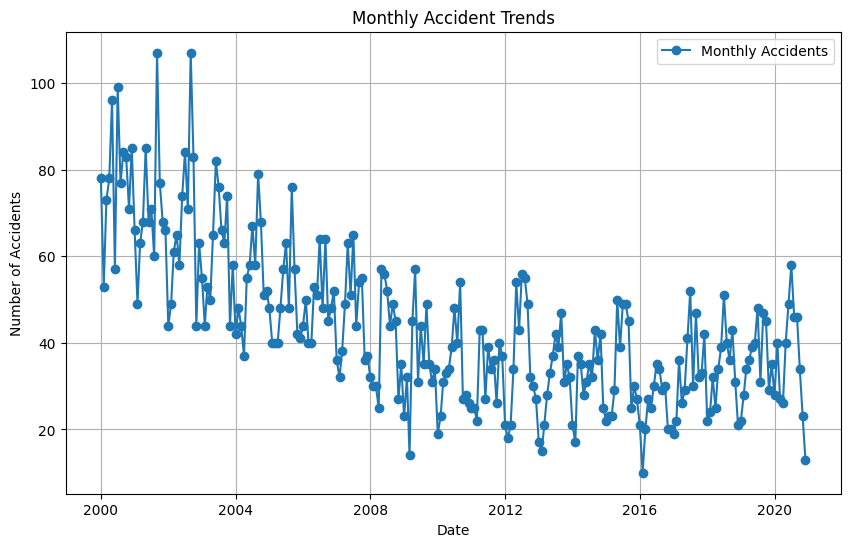

In [16]:
import matplotlib.pyplot as plt

# Group by date and sum values (if needed)
monthly_trends = monthly_data.groupby('MONAT')['WERT'].sum()

# Plot monthly trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', label='Monthly Accidents')
plt.title('Monthly Accident Trends')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.legend()
plt.show()


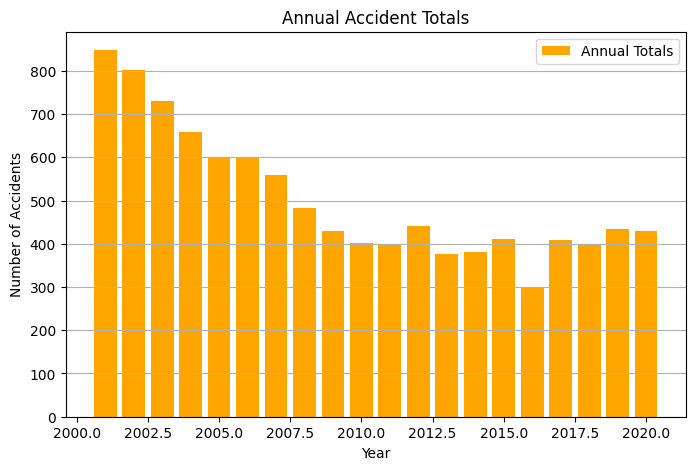

In [17]:
# Plot annual totals
plt.figure(figsize=(8, 5))
plt.bar(annual_data['JAHR'], annual_data['WERT'], color='orange', label='Annual Totals')
plt.title('Annual Accident Totals')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.legend()
plt.show()


In [19]:
# Save filtered_data to CSV (or pickle)
subset.to_csv('subset.csv', index=True)
# Alternatively, save it as a pickle file for faster loading and preserving types
subset.to_pickle('subset.pkl')


Creation of data.csv for testing purpose (2021)

In [3]:
# Keep only the first 5 columns
data_filtered = data.drop(data.columns[5:], axis=1)

# Display the remaining columns to verify
data_filtered.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [8]:
# Ensure column names match the dataset
# If column names have unexpected spaces or characters, clean them
data_filtered.columns = data_filtered.columns.str.strip()

# Drop rows with Year > 2020
data_filtered = data_filtered[data_filtered['JAHR'] == 2021]

# Verify the filtering
print(data_filtered['JAHR'].unique())


[2021]


In [9]:
# Filter for Category = "Alkoholunfälle" and Accident-type = "insgesamt"
data = data_filtered[(data_filtered['MONATSZAHL'] == 'Alkoholunfälle') & (data_filtered['AUSPRAEGUNG'] == 'insgesamt')]

# Reset the index for easier handling
data = data.reset_index(drop=True)

# Display the filtered data
data.head()


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,Summe,383.0
1,Alkoholunfälle,insgesamt,2021,202101,16.0
2,Alkoholunfälle,insgesamt,2021,202102,14.0
3,Alkoholunfälle,insgesamt,2021,202103,24.0
4,Alkoholunfälle,insgesamt,2021,202104,16.0


In [10]:
# Save filtered_data to CSV (or pickle)
data.to_csv('data.csv', index=True)
# Alternatively, save it as a pickle file for faster loading and preserving types
data.to_pickle('data.pkl')


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   13 non-null     object 
 1   AUSPRAEGUNG  13 non-null     object 
 2   JAHR         13 non-null     int64  
 3   MONAT        13 non-null     object 
 4   WERT         13 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 648.0+ bytes
